In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split

df = pd.read_csv('horse.csv', header=0)
df_sandbox = pd.read_csv('horse.csv', header=0)

In [ ]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

Outcome is our most important attribute. It helps that the dataset has no null values for that column.

In [ ]:
df.nunique().sort_values()

surgery                    2
surgical_lesion            2
lesion_3                   2
cp_data                    2
age                        2
nasogastric_tube           3
capillary_refill_time      3
nasogastric_reflux         3
outcome                    3
abdomo_appearance          3
temp_of_extremities        4
peripheral_pulse           4
peristalsis                4
abdominal_distention       4
rectal_exam_feces          4
pain                       5
abdomen                    5
lesion_2                   6
mucous_membrane            6
nasogastric_reflux_ph     20
abdomo_protein            37
rectal_temp               40
respiratory_rate          40
packed_cell_volume        50
pulse                     52
lesion_1                  61
total_protein             80
hospital_number          283
dtype: int64

In [ ]:
# this function has been taken by a lab assignment from earlier in this course

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

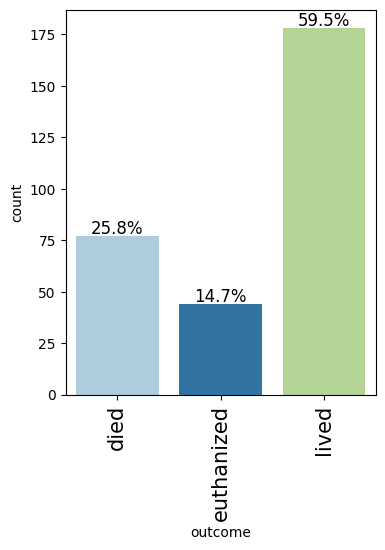

In [ ]:
labeled_barplot(df, 'outcome', perc=True)

We will ignore the 'euthanized' entries for now; aiming to reintroduce them towards the end.

'abdominal_distention' has been singled out as an important parameter by the dataset provider, so we look into it:

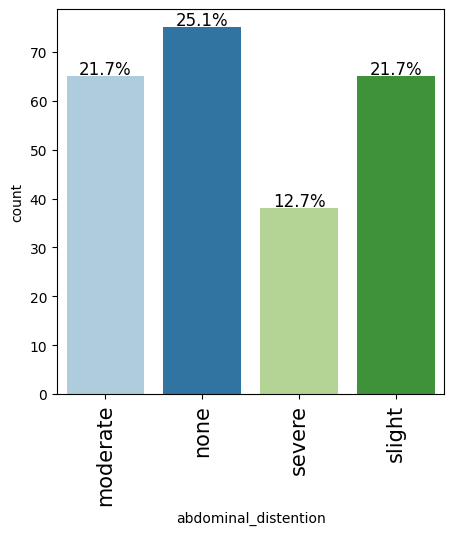

In [ ]:
labeled_barplot(df, 'abdominal_distention', perc=True)

In [ ]:
# feature = 'outcome'
# for i in range(len(df[feature])):
#   if df[feature][i] == 'euthanized':
#     df[feature][i] = 'died'

# labeled_barplot(df, 'outcome', perc=True)

Number of NaN values for abdominal_distention: 56


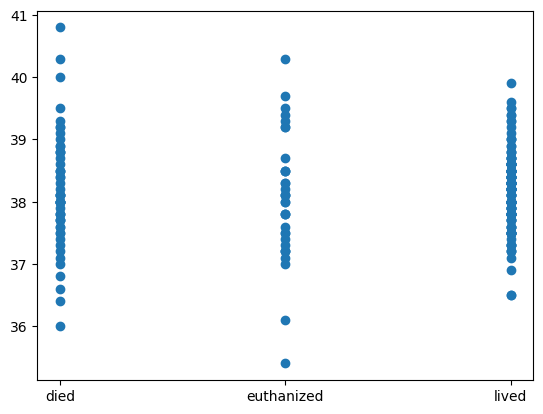

In [ ]:
# check for null values in the abdominal_distention column:
abd_dist = 'abdominal_distention'
outcome = 'outcome'
rect = 'rectal_temp'
abd_dist_num = str(df[attr].isnull().sum())
print('Number of NaN values for abdominal_distention: ' + abd_dist_num)

# for i in range(len(df['abdominal_distention']))
#   if df['abdominal_distention'][i] ==

plt.scatter(df[outcome], df[rect])

Correlation test on number-based parameters just to see if we can quickly identify any potential relationships that we want to be aware of:

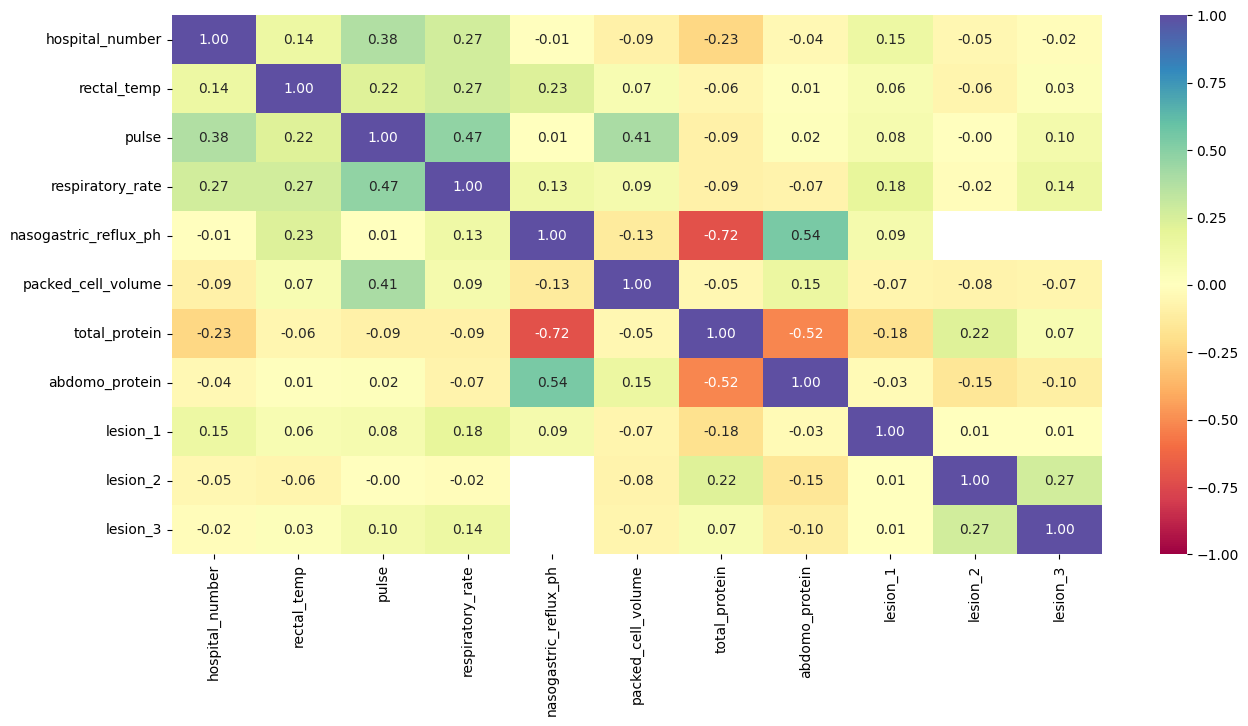

In [ ]:
# This entire block of code is from a previous lab assigment from this class.
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

Relationship between nasogastric_reflux_ph and total_protein has a negative correlation.

Relationship between total_protein and abdomo_protein being a negative correlation was intereting to me. I went to the dataset and manually glanced over the values.

While abdomo_protein values ranged between 2.0-6.0, total_protein  had values in the single-digit values, with some outliers in the 70s and 80s. These higher values in total_protein meant the horse was dehydrated, while abdomo_protein meant a different thing: compromised gut.

This made me be aware of how I've been assuming what the attributes meant just by their names. The dataset provides descriptions of each attributes.



In [ ]:
X = df.drop('outcome', axis=1)
y = df['outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

X_train.shape, X_test.shape
cols = X_train.columns
print(y_test)

222    lived
135     died
67     lived
159    lived
211    lived
       ...  
166    lived
261    lived
236    lived
144    lived
243    lived
Name: outcome, Length: 75, dtype: object
